In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time

In [39]:
# Example Inputs
batch_size = 32
num_heads = 2
seq_len = 2 * 2
# Random attention scores and relative position embeddings
attention_scores = torch.randn(batch_size, num_heads, seq_len, seq_len)
relative_position_embeddings = torch.randn(num_heads, seq_len, seq_len)
attention_scores += relative_position_embeddings

# Generate a random boolean mask
mask = torch.tensor([[False, True, False, True]])  # Example mask

# Step 1: Start with a base mask tensor
# Shape: (batch_size, seq_len, seq_len)
base_mask = torch.zeros((batch_size, seq_len, seq_len), dtype=torch.float)
start = time.time()
# Apply masking rules
for b in range(batch_size):
    for i in range(seq_len):
        if mask[b, i]:  # If patch is masked
            # Mask columns: No one attends to this patch (except itself)
            base_mask[b, :, i] = -float('inf')
            base_mask[b, i, i] = 0.0  # Preserve self-attention
            
            # Mask rows: This patch only attends to unmasked patches (and itself)
            base_mask[b, i, :] = 0.0  # Allow attention to all initially
            base_mask[b, i, mask[b]] = -float('inf')  # Ignore other masked patches
            base_mask[b, i, i] = 0.0  # Preserve self-attention

# Step 2: Expand base_mask to match attention_scores shape
base_mask = base_mask.unsqueeze(1).expand(batch_size, num_heads, seq_len, seq_len)
stop = time.time()
# Step 3: Add the mask to the attention scores
attention_scores_with_mask = attention_scores + base_mask

# Step 4: Apply softmax to get the final attention scores
attention_probs = F.softmax(attention_scores_with_mask, dim=-1)


# Outputs
print("Time taken:", stop - start)
print("Attention Scores:", attention_scores)
print("Mask:", mask)
print("Base Mask:", base_mask)
print("Masked Attention Scores:", attention_scores_with_mask)
print("Attention Probs:", attention_probs)

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [38]:
import torch

# Example Inputs
batch_size = 1
num_heads = 1
seq_len = 2 * 2
# Random attention scores and relative position embeddings
attention_scores = torch.randn(batch_size, num_heads, seq_len, seq_len)
relative_position_embeddings = torch.randn(num_heads, seq_len, seq_len)
attention_scores += relative_position_embeddings

# Generate a random boolean mask
mask = torch.tensor([[False, False, False, True]])  # Example mask

# Step 1: Start with a base mask tensor
# Shape: (batch_size, seq_len, seq_len)
base_mask = torch.zeros((batch_size, seq_len, seq_len), dtype=torch.float)
start = time.time()
# Mask columns: Block attention to masked patches from others (except self-attention)
masked_indices = mask.nonzero(as_tuple=True)  # Indices of masked patches
base_mask[masked_indices[0], :, masked_indices[1]] = -float('inf')  # Block attention to masked patches
base_mask[:, torch.arange(seq_len), torch.arange(seq_len)] = 0.0  # Allow self-attention for all

# Mask rows: Masked patches should only attend to unmasked patches (and themselves)
unmasked_mask = ~mask  # Logical NOT of the mask (unmasked locations)
attention_mask = unmasked_mask.unsqueeze(1).repeat(1, seq_len, 1)  # Shape: (batch_size, seq_len, seq_len)
base_mask[attention_mask] = 0.0  # Allow attention to unmasked locations
base_mask[:, torch.arange(seq_len), torch.arange(seq_len)] = 0.0  # Preserve self-attention

# Expand base_mask to match attention_scores shape
base_mask = base_mask.unsqueeze(1).expand(batch_size, num_heads, seq_len, seq_len)
stop = time.time()
# Step 3: Add the mask to the attention scores
attention_scores_with_mask = attention_scores + base_mask

# Step 4: Apply softmax to get the final attention scores
attention_probs = F.softmax(attention_scores_with_mask, dim=-1)


# Outputs
print("Time taken:", stop - start)
print("Attention Scores:", attention_scores)
print("Mask:", mask)
print("Base Mask:", base_mask)
print("Masked Attention Scores:", attention_scores_with_mask)
print("Attention Probs:", attention_probs)

Time taken: 0.002151012420654297
Attention Scores: tensor([[[[ 2.6680,  2.0032, -0.8085, -0.0873],
          [ 1.5062, -3.1881, -0.2354,  0.1392],
          [ 1.0458,  0.0190, -1.1437, -0.4244],
          [ 2.0606,  3.3580,  0.1513, -0.1046]]]])
Mask: tensor([[False, False, False,  True]])
Base Mask: tensor([[[[0., 0., 0., -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]]]])
Masked Attention Scores: tensor([[[[ 2.6680,  2.0032, -0.8085,    -inf],
          [ 1.5062, -3.1881, -0.2354,    -inf],
          [ 1.0458,  0.0190, -1.1437,    -inf],
          [ 2.0606,  3.3580,  0.1513, -0.1046]]]])
Attention Probs: tensor([[[[0.6471, 0.3329, 0.0200, 0.0000],
          [0.8443, 0.0077, 0.1480, 0.0000],
          [0.6802, 0.2436, 0.0762, 0.0000],
          [0.2031, 0.7434, 0.0301, 0.0233]]]])


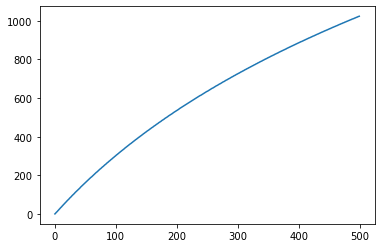

[   1    4    8   11   14   18   21   25   28   32   35   38   42   45
   49   52   55   59   62   65   69   72   75   78   82   85   88   91
   95   98  101  104  107  111  114  117  120  123  126  129  132  135
  139  142  145  148  151  154  157  160  163  166  169  172  175  178
  181  184  187  190  192  195  198  201  204  207  210  213  216  218
  221  224  227  230  233  235  238  241  244  246  249  252  255  257
  260  263  266  268  271  274  276  279  282  284  287  290  292  295
  298  300  303  306  308  311  313  316  319  321  324  326  329  331
  334  336  339  342  344  347  349  352  354  357  359  362  364  366
  369  371  374  376  379  381  384  386  388  391  393  396  398  400
  403  405  407  410  412  415  417  419  422  424  426  429  431  433
  435  438  440  442  445  447  449  451  454  456  458  460  463  465
  467  469  472  474  476  478  480  483  485  487  489  491  494  496
  498  500  502  504  507  509  511  513  515  517  519  521  524  526
  528 

In [45]:
def prob_log_scheduler(x):
    value = (1024*np.log((((np.exp(1)-1)*x)/500) + 1) + np.random.randint(0, 10)).astype(int)
    for val in value:
        if val > 1024:
            val = 1024
        elif val < 0:
            val = 0
    return value

x = np.arange(500)
y = prob_log_scheduler(x)
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()
print(y)

In [91]:
data_array = np.load("/Users/oscaro/Library/CloudStorage/OneDrive-NTNU/GeoDecepticon/data_array_1.npz")
data_array = data_array['data_array']
first_data = data_array[2].astype(np.float32)

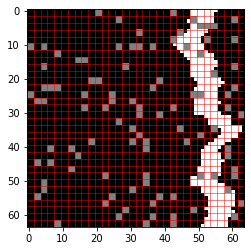

In [92]:
# Create a mask of size 32x32
mask = np.zeros((32, 32))

# Select 100 random patches
random_indices = np.random.choice(32 * 32, 100, replace=False)  # Ensure no duplicates
mask_indices = np.unravel_index(random_indices, (32, 32))  # Convert flat indices to 2D
mask[mask_indices] = 1  # Set selected mask locations to 1

# Debug: Check the mask
#print("Mask:\n", mask)
#print("Number of selected patches:", np.sum(mask))

# Update `first_data` based on the mask
for i in range(32):
    for j in range(32):
        if mask[i, j] == 1:
            #print(f"Updating patch at mask[{i}, {j}]")  # Debug
            first_data[i*2:i*2+2, j*2:j*2+2] = 0.5  # Set 2x2 patches to 0.5

# Debug: Verify updated `first_data`
#print("First data after updates:\n", first_data)

# Check indices where value is 0.5
patch_indices = np.where(first_data == 0.5)
#print("Indices of patches with value 0.5:", patch_indices)

# Plot the updated data with red grid lines
plt.imshow(first_data, cmap='gray')
for i in range(32):
    plt.axhline(i * 2 - 0.5, color='r', linewidth=0.5)  # Horizontal grid lines
    plt.axvline(i * 2 - 0.5, color='r', linewidth=0.5)  # Vertical grid lines
plt.show()

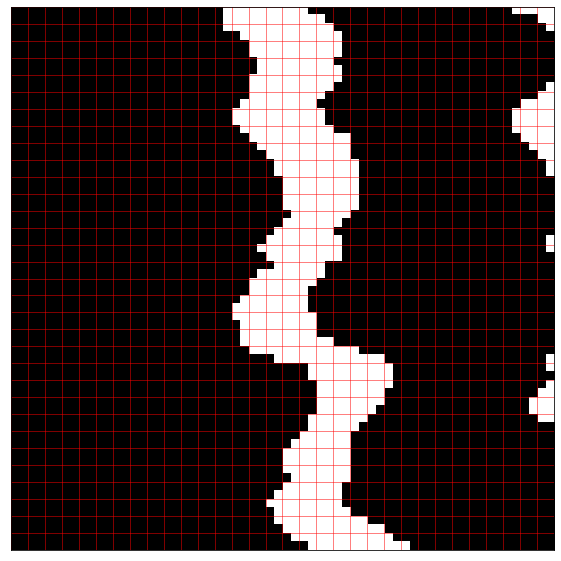

In [51]:
data = data_array['data_array']
# Add grid lines to distinguish patches in the binary image
fig, ax = plt.subplots(figsize=(10, 10))

# Display the binary image
ax.imshow(data[0], cmap='gray', interpolation='nearest')

# Add grid lines to highlight the patches
patch_size = 2
for i in range(0, data[0].shape[0] + 1, patch_size):
    ax.axhline(i - 0.5, color='red', linewidth=0.5)  # Horizontal lines
    ax.axvline(i - 0.5, color='red', linewidth=0.5)  # Vertical lines

# Set the title and remove ticks for better visualization
ax.set_xticks([])
ax.set_yticks([])

plt.show()